# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [11]:
import pandas as pd

## imports for Python, Pandas

In [12]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [13]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [14]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [15]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [19]:
# load json as string
json.load((open('world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [20]:
# load as Pandas dataframe
sample_json_df = pd.read_json('world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [227]:
import matplotlib.pyplot as plt
%matplotlib inline
from io import StringIO
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [228]:
df = pd.read_json('world_bank_projects.json')

In [229]:
df.head(1)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,docty,envassesmentcategorycode,grantamt,ibrdcommamt,id,idacommamt,impagency,lendinginstr,lendinginstrtype,lendprojectcost,majorsector_percent,mjsector_namecode,mjtheme,mjtheme_namecode,mjthemecode,prodline,prodlinetext,productlinetype,project_abstract,project_name,projectdocs,projectfinancialtype,projectstatusdisplay,regionname,sector,sector1,sector2,sector3,sector4,sector_namecode,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,"Project Information Document,Indigenous People...",C,0,0,P129828,130000000,MINISTRY OF EDUCATION,Investment Project Financing,IN,550000000,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...","[{'code': 'EX', 'name': 'Education'}, {'code':...",[Human development],"[{'code': '8', 'name': 'Human development'}, {...","8,11",PE,IBRD/IDA,L,{'cdata': 'The development objective of the Se...,Ethiopia General Education Quality Improvement...,"[{'DocDate': '28-AUG-2013', 'EntityID': '09022...",IDA,Active,Africa,"[{'Name': 'Primary education'}, {'Name': 'Seco...","{'Percent': 46, 'Name': 'Primary education'}","{'Percent': 26, 'Name': 'Secondary education'}","{'Percent': 16, 'Name': 'Public administration...","{'Percent': 12, 'Name': 'Tertiary education'}","[{'code': 'EP', 'name': 'Primary education'}, ...","ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...


## Finding Top 10 Countries With Respect to Projects
-__Kind of a misnomer since Africa is included and its a continent, but thats ok__

In [230]:
#top 10 countries by project
df.groupby('countryname').project_name.count().nlargest(10)

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Africa                             11
Republic of Mozambique             11
Name: project_name, dtype: int64

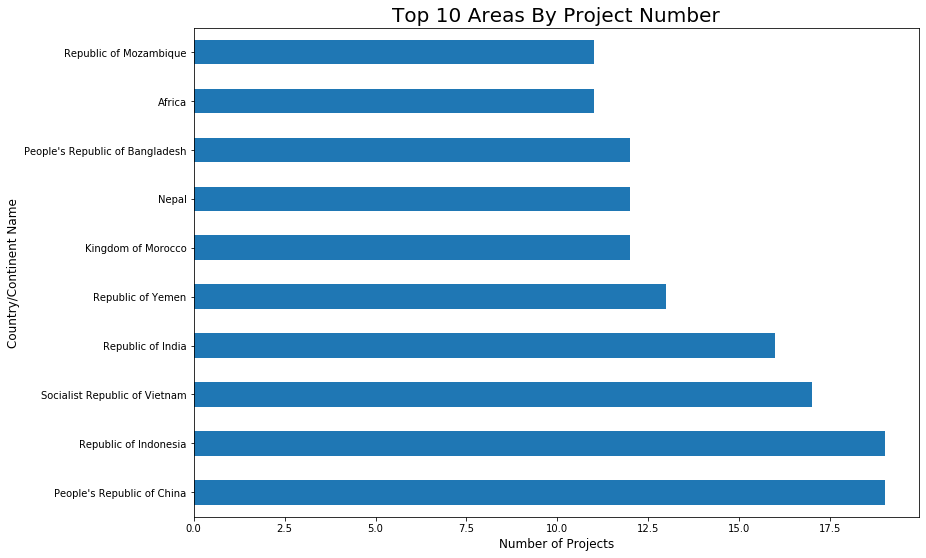

In [231]:
#plot it out
df.groupby('countryname').project_name.count().nlargest(10).plot(kind = 'barh', figsize = (13, 9))
plt.title('Top 10 Areas By Project Number', fontsize = 20)
plt.xlabel('Number of Projects', fontsize = 12)
plt.ylabel('Country/Continent Name', fontsize = 12);

## Finding Project Themes

In [232]:
#creating subset of themes from the df with the largest 10
top_ten_themes = df['mjtheme_namecode'].value_counts().nlargest(10)
top_ten_themes

[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '11', 'name': 'Environment and natural resources management'}]                                                                                12
[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]                                                                                                                                                        11
[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]                                                                                                                                         8
[{'code': '4', 'name': 'Financial and private sector development'}, {'code': '4', 'name': 'Financial and private sector development'}]                                                                                           6
[{'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector gov

__Look at the list of dicts in project themes__

In [233]:
#looping over the top_ten_themes value counts, notice the empty names beside 
for list_of_dicts in top_ten_themes.keys():
    print(list_of_dicts)

[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '11', 'name': 'Environment and natural resources management'}]
[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]
[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]
[{'code': '4', 'name': 'Financial and private sector development'}, {'code': '4', 'name': 'Financial and private sector development'}]
[{'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector governance'}]
[{'code': '8', 'name': 'Human development'}, {'code': '7', 'name': 'Social dev/gender/inclusion'}]
[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]
[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '1

In [234]:
#seeing that we have missing values for name beside code numbers 11 and 4, I am going to loop over these and update the dictionary values associated with code numbers 
for list_of_dicts in top_ten_themes.keys():
    for dictionary in list_of_dicts:
        if dictionary['code'] == '11':
            dictionary.update({'name':'Environment and natural resources management'})
        elif dictionary['code'] == '4':
            dictionary.update({'name':'Financial and private sector development'})

In [235]:
#check to see if the lists of dictionaries are updated, it appears that they are
for list_of_dicts in top_ten_themes.keys():
    print(list_of_dicts)

[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '11', 'name': 'Environment and natural resources management'}]
[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': 'Environment and natural resources management'}]
[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]
[{'code': '4', 'name': 'Financial and private sector development'}, {'code': '4', 'name': 'Financial and private sector development'}]
[{'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector governance'}]
[{'code': '8', 'name': 'Human development'}, {'code': '7', 'name': 'Social dev/gender/inclusion'}]
[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]
[{'code': '11', 'name': 'Environment and

## Creating Data Frame With Names Filled In
-__Here I am creating a df with the values within the 'names' keys with missing data filled in__

-__Seemed to me that this was what the assignment was asking for, not merging this back into the original dataframe, but this could be done__

In [200]:
#creating df and renaming columns 
json_df = pd.DataFrame(top_ten_themes).reset_index().rename(columns = {'index':'theme', 'mjtheme_namecode':'frequency'})

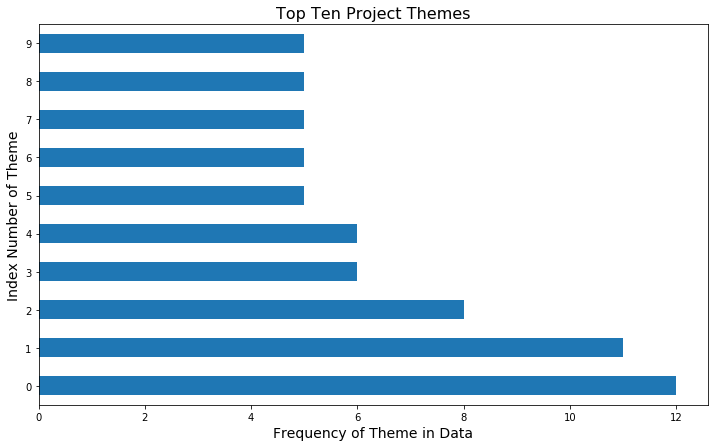

In [225]:
json_df.plot(kind = 'barh', figsize = (12, 7), legend = False)
plt.title('Top Ten Project Themes', fontsize = 16)
plt.ylabel('Index Number of Theme', fontsize = 14)
plt.xlabel('Frequency of Theme in Data', fontsize = 14);

In [238]:
#here is the full untrucated df, showing the key value pairs of complete data now 
pd.set_option('display.max_colwidth', -1)
json_df

,theme,frequency
0,"[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '11', 'name': 'Environment and natural resources management'}]",12
1,"[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': 'Environment and natural resources management'}]",11
2,"[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]",8
3,"[{'code': '4', 'name': 'Financial and private sector development'}, {'code': '4', 'name': 'Financial and private sector development'}]",6
4,"[{'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector governance'}]",6
5,"[{'code': '8', 'name': 'Human development'}, {'code': '7', 'name': 'Social dev/gender/inclusion'}]",5
6,"[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]",5
7,"[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '11', 'name': 'Environment and natural resources management'}]",5
8,"[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '4', 'name': 'Financial and private sector development'}]",5
9,"[{'code': '4', 'name': 'Financial and private sector development'}, {'code': '5', 'name': 'Trade and integration'}]",5
